# Numerical Integration

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline

## Trapezoidal method

In [11]:
def trapezoidal_method(f, n, a, b):
    interval = np.linspace(a,b,num=n)
    f_interval = np.array((list(map(f,interval))))
    totSum = sum(2*f_interval[1:(n-1)]) + f_interval[0] + f_interval[n-1]
    h = (b-a)/n
    area = totSum*(h/2)
    return(area)
    

In [63]:
def f(x):
    return(x**2)

In [13]:
a = 0
b = 2
n = 10000
interval = np.linspace(a,b,num=n)

In [38]:
trapezoidal_method(f,1000, 1,3)

8.664933386677324

## Simpson's rule (Newton-Coates with n=2)

In [39]:
def simpons_method(f, n, a, b):
    interval = np.linspace(a,b,num=n)
    f_interval = np.array(list(map(f,interval)))
    totSum = sum(f_interval[0:-1:2]) +  sum(4 * f_interval[1::2]) + sum(f_interval[2::2])
    h = (b-a)/n
    area = totSum*(h/3)
    return(area)
    

In [42]:
simpons_method(f,1000, 1,3)

8.670004004004

In [69]:
L = np.arange(1000,20000, 1000)

In [71]:
trap_results = []
simpson_results = []

for i in L:
    trap_results.append(trapezoidal_method(f,i, 1,3))
    simpson_results.append(simpons_method(f,i, 1,3))

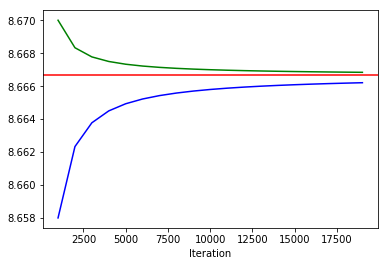

In [83]:
plt.plot(L,trap_results,c='blue')
plt.plot(L,simpson_results, c='green')
plt.xlabel('Iteration')
axes = plt.gca()
axes.axhline(y=26/3,c='red')
plt.show()

## Gaussain Quadrature

In [61]:
from scipy.integrate import quadrature

In [64]:
quadrature(f, 0, 2, maxiter = 4)

(2.6666666666666665, 4.440892098500626e-16)

## Monte Carlo Integration

In [65]:
def mcIntegration(f, n, a, b):

    rand_unif_samples = np.random.uniform(a, b, n)
    f_interval_mean = np.mean(np.array(list(map(f,rand_unif_samples))))
    area = f_interval_mean * (b-a)
    return(area)

In [66]:
mcIntegration(f,10000, 1,3)

8.716301306165233

In [67]:
L = [10,100,1000,10000,100000,1000000]

In [68]:
MC_results = []

for i in L:
    MC_results.append(mcIntegration(f,i, 1,3))

In [69]:
MC_results

[10.308079989124966,
 8.55637399428899,
 8.572115665524278,
 8.722369202821596,
 8.660179678293241,
 8.677749165291146]

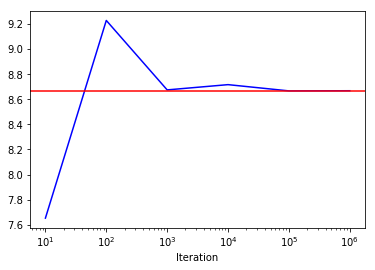

In [43]:
plt.plot(L,MC_results,c='blue')
plt.xlabel('Iteration')
plt.xscale('log')
axes = plt.gca()
axes.axhline(y=26/3,c='red')
plt.show()

## Importance Sampling

In [70]:
import scipy.stats as stats
from scipy.stats import truncnorm

In [71]:
r = truncnorm.rvs(0, 1, size=1000000)

In [72]:
np.mean(r)

0.45973133559263

In [73]:
n = 100000
y = stats.uniform.rvs(size=n)
mean = 1.0/n * np.sum(y * stats.norm().pdf(y)/(stats.norm.cdf(1) - stats.norm.cdf(0)))

print(mean)

0.459219205720153


## Markov Chain Monte Carlo (MCMC) Integration

### Metropolis Hastings Algorithm

In [74]:
from scipy.stats import norm

Sample from Cauchy distribution based on standard normal proposal distribution

In [75]:
def standard_cauchy(x):
    return(1/(np.pi*(1+x**2)))

In [76]:
def metropolis_hastings(func, iter=1000):
    x = 0.
    samples = np.zeros(iter)

    for i in range(iter):
        x_star = np.array([x]) + np.random.normal(size=1)
        if np.random.rand() < (func(x_star)/func(x)):
            x = x_star
        samples[i] = np.array([x])


    return samples

In [77]:
J  = metropolis_hastings(standard_cauchy, iter=10000)

Text(0.5,1,'Cauchy distribution')

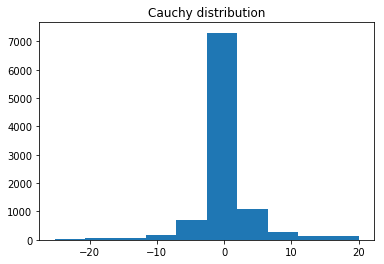

In [78]:
plt.hist(J)
plt.title("Cauchy distribution")
